# Assignment 1

## Performance Analysis and Fine-Tuning of Language Models on WikiText and GSM8K

####The Chosen open source language model is : DistilBERT

DistilBERT is a small, fast version of BERT (which is a famous large language model from Google).

-contains arround : 66 million parameters (small)

-DistilBERT is like a "compressed copy" of BERT that keeps 97% of the intelligence but is much smaller and faster, it is 	60% faster than BERT.

-BERT was very powerful but very slow and large (110M+ parameters).

### Full Plan:
- Load and benchmark an open-source language model (**DistilBERT**).
- Perform throughput optimization and fine-tuning.
- Benchmark performance on **WikiText** and **GSM8K** datasets.
- Analyze differences in quality and throughput across three versions (Base, Optimized, Fine-tuned).

 ### What is Benchmarking?

 Testing the model performance under specific conditions (e.g., how fast? how accurate? how efficient?)

Comparing models before and after optimization or fine-tuning.

so : Benchmarking = Testing + Measuring + Comparing.

 ### What is Throughput and How is it Calculated?

 How many samples the model can process per second.

It is a measure of the model speed (not accuracy).

formula:
Throughput = Number of samples processed / Time taken (seconds).

Higher throughput = faster model = better for real-time applications.

### Libraries

In [1]:
!pip install transformers datasets evaluate bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import torch
from transformers import AutoModelForMaskedLM, AutoTokenizer, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import load_dataset
import evaluate
import time
import matplotlib.pyplot as plt
import numpy as np

###Step 1: Load an open source language model

Base Model Loading :  (DistilBERT)

In [3]:
model_checkpoint = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForMaskedLM.from_pretrained(model_checkpoint)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f"Model loaded on {device}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Model loaded on cuda


### Datasets Loading : (WikiText and GSM8K)

WikiText

In [4]:
# Load WikiText
wikitext = load_dataset("wikitext", "wikitext-2-raw-v1", split="train")

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/733k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.36M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [5]:
wikitext

Dataset({
    features: ['text'],
    num_rows: 36718
})

In [6]:
print("WikiText Dataset (First 100 samples):\n")
for i in range(100):
    print(f"[{i}] {wikitext[i]['text']}")
    print("-" * 50)

WikiText Dataset (First 100 samples):

[0] 
--------------------------------------------------
[1]  = Valkyria Chronicles III = 

--------------------------------------------------
[2] 
--------------------------------------------------
[3]  Senjō no Valkyria 3 : Unrecorded Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " Calamaty Raven " . 

--------------------------------------------------
[

GSM8K

In [7]:
# Load GSM8K
gsm8k = load_dataset("gsm8k", "main", split="train")

README.md:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7473 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1319 [00:00<?, ? examples/s]

In [8]:
gsm8k

Dataset({
    features: ['question', 'answer'],
    num_rows: 7473
})

In [9]:
print("\nGSM8K Dataset (First 100 samples):\n")
for i in range(100):
    print(f"[{i}] Question: {gsm8k[i]['question']}")
    print(f"[{i}] Answer: {gsm8k[i]['answer']}")
    print("-" * 50)


GSM8K Dataset (First 100 samples):

[0] Question: Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?
[0] Answer: Natalia sold 48/2 = <<48/2=24>>24 clips in May.
Natalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.
#### 72
--------------------------------------------------
[1] Question: Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?
[1] Answer: Weng earns 12/60 = $<<12/60=0.2>>0.2 per minute.
Working 50 minutes, she earned 0.2 x 50 = $<<0.2*50=10>>10.
#### 10
--------------------------------------------------
[2] Question: Betty is saving money for a new wallet which costs $100. Betty has only half of the money she needs. Her parents decided to give her $15 for that purpose, and her grandparents twice as much as her parents. How much more money does Betty need to buy the wallet?
[2] Answer: In the b

In [10]:
print(f"WikiText Size: {len(wikitext)} samples")
print(f"GSM8K Size: {len(gsm8k)} samples")

WikiText Size: 36718 samples
GSM8K Size: 7473 samples


### Prepare Data for DistilBERT

Just Tokenization

In [11]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

tokenized_wikitext = wikitext.map(tokenize_function, batched=True, remove_columns=["text"])
tokenized_gsm8k = gsm8k.map(lambda x: {"text": x["question"] + " " + x["answer"]}, remove_columns=["question", "answer"])
tokenized_gsm8k = tokenized_gsm8k.map(tokenize_function, batched=True)
# Set format to torch tensors (VERY IMPORTANT STEP)
tokenized_wikitext.set_format(type="torch", columns=["input_ids", "attention_mask"])
tokenized_gsm8k.set_format(type="torch", columns=["input_ids", "attention_mask"])
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.15)


Map:   0%|          | 0/36718 [00:00<?, ? examples/s]

Map:   0%|          | 0/7473 [00:00<?, ? examples/s]

Map:   0%|          | 0/7473 [00:00<?, ? examples/s]

###Step 2: Perform benchmarks on multiple datasets

 Benchmark Base Model (Measure Throughput)

it Evaluate the model on a dataset by calculating average loss and perplexity.
 Returns:

-avg_loss: Average loss over dataset

-perplexity: Perplexity score (lower = better)

In [13]:
def benchmark(dataset, model, tokenizer, batch_size=8, field="text"):
    model.eval()
    losses = []
    total_samples = len(dataset)

    start_time = time.time()

    for i in range(0, total_samples, batch_size):
        batch_texts = dataset[i:i+batch_size][field]

        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=128)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
            losses.append(loss.item())

    elapsed_time = time.time() - start_time

    avg_loss = sum(losses) / len(losses)
    perplexity = torch.exp(torch.tensor(avg_loss))

    print(f"Processed {total_samples} samples in {elapsed_time:.2f} seconds")
    print(f"Avg Loss = {avg_loss:.4f} | Perplexity = {perplexity:.4f}")

    return avg_loss, perplexity.item()


In [14]:
# Benchmark Loss and Perplexity
wikitext_loss_base, wikitext_perplexity_base = benchmark(wikitext, model, tokenizer, batch_size=8, field="text")

Processed 36718 samples in 175.23 seconds
Avg Loss = 10.1563 | Perplexity = 25753.6113


Average Loss: 10.1563 — this indicates how much the model is “off” when predicting the next word (lower is better).

Perplexity: 25753.6113 — a high perplexity value means the model is confused or uncertain about its predictions. Lower perplexity is better (suggesting the model understands the data well).


WikiText perplexity is much higher, meaning it's harder for the model to predict words accurately in general text.

In [15]:
# Benchmark Loss and Perplexity
gsm8k_loss_base, gsm8k_perplexity_base = benchmark(gsm8k, model, tokenizer, batch_size=8, field="question")

Processed 7473 samples in 31.39 seconds
Avg Loss = 7.1805 | Perplexity = 1313.5699


Average Loss: 7.1805 — this is a lower loss compared to WikiText, which means the model's predictions for GSM8K are more accurate.

Perplexity: 1313.5699 — this is also lower than WikiText, meaning the model is more confident when solving the math questions in GSM8K.

GSM8K perplexity is lower, meaning the model is better at solving math questions because they are more structured.

### Step 3: Measureing and reporting the throughput of the model.

 Measure the model throughput (samples processed per second) on a dataset.

Returns:

-throughput: Samples processed per second

In [16]:
def measure_throughput(dataset, model, tokenizer, batch_size=8, field="text"):

    model.eval()
    total_samples = len(dataset)

    start_time = time.time()

    for i in range(0, total_samples, batch_size):
        batch_texts = dataset[i:i+batch_size][field]

        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=128)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)

    elapsed_time = time.time() - start_time

    throughput = total_samples / elapsed_time
    print(f"Throughput: {throughput:.2f} samples/sec")

    return throughput


In [17]:
# Measure Throughput
wikitext_throughput_base = measure_throughput(wikitext, model, tokenizer, batch_size=8, field="text")

Throughput: 215.54 samples/sec


DistilBERT can read and process 215 sentences or passages from WikiText every second.

In [18]:
# Measure Throughput
gsm8k_throughput_base = measure_throughput(gsm8k, model, tokenizer, batch_size=8, field="question")

Throughput: 251.32 samples/sec


DistilBERT can solve and process 251 math questions (textual form) every second.

Throughput for WikiText and GSM8K are close to each other, because:

Both datasets after tokenization have similar input size (sequence length ~128 tokens).

Both are text data, so the model processes them similarly.

###Step 4: Optimizations on the model that would increase its throughput.

Optimization (Quantization to 8-bit)

We now optimize the DistilBERT model using 8-bit quantization.
Quantization reduces model size and memory usage, making the model faster (higher throughput).
We will use `bitsandbytes` library.


so , in this step :we are changing how DistilBERT is stored and runs in memory.

Instead of using: 32-bit floating point numbers (which are large)

We compress it to: 8-bit integers (much smaller)

This is called 8-bit Quantization , It saves a lot of memory and makes model computations faster — without retraining the model from scratch.

In [19]:
!pip install -U bitsandbytes

In [20]:
from transformers import BitsAndBytesConfig

In [21]:
bnb_config = BitsAndBytesConfig(
    load_in_8bit=True  # 8-bit quantization
)

model_optimized = AutoModelForMaskedLM.from_pretrained(
    model_checkpoint,
    device_map="auto",
    quantization_config=bnb_config
)

print("Model optimized with 8-bit quantization successfully.")


Model optimized with 8-bit quantization successfully.


###Step 5: Repeating Benchmark on Optimized Model

In [22]:
# Benchmark Loss and Perplexity
wikitext_loss_optimized, wikitext_perplexity_optimized = benchmark(wikitext, model_optimized, tokenizer, batch_size=8, field="text")

Processed 36718 samples in 176.85 seconds
Avg Loss = 10.2135 | Perplexity = 27268.6855


Loss and perplexity have increased slightly after 8-bit quantization. This is normal because optimization typically leads to slight losses in accuracy. But the difference is minimal.

The model is still performing reasonably well for general text.

In [23]:
# Benchmark Loss and Perplexity
gsm8k_loss_optimized, gsm8k_perplexity_optimized = benchmark(gsm8k, model_optimized, tokenizer, batch_size=8, field="question")

Processed 7473 samples in 30.86 seconds
Avg Loss = 7.1874 | Perplexity = 1322.6748


Both loss and perplexity are almost unchanged after quantization.

The optimized model is still performing very well for math word problems and hasn’t been affected much by the 8-bit quantization.

### Step 6: Measureing and reporting the new throughput of the model.

After quantization, we re-measure the throughput to check speed improvements.

In [24]:
throughput_wikitext_optimized = measure_throughput(wikitext, model_optimized, tokenizer, batch_size=8, field="text")
print(f"Throughput - WikiText (Optimized): {throughput_wikitext_optimized:.2f} samples/sec")

Throughput: 251.56 samples/sec
Throughput - WikiText (Optimized): 251.56 samples/sec



Improved throughput from 215.54 to 251.56 samples/sec after 8-bit quantization.

In [25]:
throughput_gsm8k_optimized = measure_throughput(gsm8k, model_optimized, tokenizer, batch_size=8, field="question")
print(f"Throughput - GSM8K (Optimized): {throughput_gsm8k_optimized:.2f} samples/sec")

Throughput: 260.46 samples/sec
Throughput - GSM8K (Optimized): 260.46 samples/sec


increasing in throughput from 251.32 to 260.46 samples/sec,still faster than the base model.



### Step 7: Fine-tune the model.

Fine-tuning the model means updating the weights of the pre-trained model (DistilBERT) to make it more accurate for your specific dataset .

This will help the model understand the language in WikiText better, especially after being compressed via 8-bit quantization.

What Does Fine-Tuning Do?

-Improves Accuracy: After quantization, the model might be slightly less accurate, so fine-tuning helps restore or even improve the accuracy.

-Increases Adaptation to Dataset: The model will learn specific patterns of the WikiText dataset.



In [26]:
!pip show transformers

Name: transformers
Version: 4.51.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft, sentence-transformers


In [27]:
!pip install --upgrade transformers

In [28]:
from transformers import Trainer, TrainingArguments

What We Did to Fine-Tune the Model:

-Set Up Training Arguments:

Batch size for training and evaluation.

Number of epochs: We used 1 epoch for quick fine-tuning (one pass through the dataset).

-Set Up the Trainer:

The Trainer is a class that takes care of the training loop (all the complicated stuff for us). It handles how the model gets updated with new data.

We told the Trainer:

The model (DistilBERT).

The training dataset (tokenized_wikitext).

The evaluation dataset (tokenized_gsm8k), in case we want to check performance on another dataset.

Data collator: Helps in batching the data properly.

Tokenizer: To convert text into a format the model understands.

for wikitext

In [29]:
# Step 1: Set up the training arguments
training_args = TrainingArguments(
    output_dir='./distilbert-finetuned',  # Save fine-tuned model
    per_device_train_batch_size=8,  # Training batch size
    per_device_eval_batch_size=8,  # Evaluation batch size
    num_train_epochs=1,  # Fine-tuning for 1 epoch (quick)
    weight_decay=0.01,  # Regularization
    logging_dir='./logs',  # Where logs are saved
    logging_steps=10,  # Log every 10 steps
    report_to="none",  # Disable wandb reporting
)


# Step 2: Set up the Trainer
trainer = Trainer(
    model=model,  # Fine-tune the original model (not the quantized one)
    args=training_args,  # Training arguments defined above
    train_dataset=tokenized_wikitext,  # Use tokenized WikiText for training
    eval_dataset=tokenized_gsm8k,  # Use tokenized GSM8K for evaluation (optional)
    data_collator=data_collator,  # Prepare the data
    tokenizer=tokenizer,  # Tokenizer for the model
)


trainer.train()
model_finetuned_wikitext = model
print("Fine-tuning complete.")


<ipython-input-29-aa3c94668533>:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,2.536000
20,2.589700
30,2.239800
40,2.243900
50,2.228200
60,2.328700
70,1.985300
80,2.348800
90,2.057000
100,2.493500


Fine-tuning complete.


1. Step:
This is the training step during the fine-tuning process. It represents how many iterations or batches the model has processed.

Example: At Step 10, the model has completed the 10th batch, at Step 20, it has completed the 20th batch, and so on.

2. Training Loss:
This is the loss value of the model after processing a specific number of steps.

for GSM8K

In [30]:
# Step 1: Set up the training arguments
training_args = TrainingArguments(
    output_dir='./distilbert-finetuned',  # Save fine-tuned model
    per_device_train_batch_size=8,  # Training batch size
    per_device_eval_batch_size=8,  # Evaluation batch size
    num_train_epochs=1,  # Fine-tuning for 1 epoch (quick)
    weight_decay=0.01,  # Regularization
    logging_dir='./logs',  # Where logs are saved
    logging_steps=10,  # Log every 10 steps
    report_to="none",  # Disable wandb reporting
)


# Step 2: Set up the Trainer
trainer = Trainer(
    model=model,  # Fine-tune the original model (not the quantized one)
    args=training_args,  # Training arguments
    train_dataset=tokenized_wikitext,  # Use tokenized WikiText for training
    eval_dataset=tokenized_gsm8k,  # Use tokenized GSM8K for evaluation (optional)
    data_collator=data_collator,  # Prepare the data
    tokenizer=tokenizer,  # Tokenizer for the model
)



trainer.train()
model_finetuned_GSM8K= model
print("Fine-tuning complete.")


<ipython-input-30-2d2a2c4a8b1c>:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.692300
20,0.992800
30,0.796200
40,0.706100
50,0.764100
60,0.882400
70,0.677200
80,0.934200
90,0.720000
100,0.944700


Fine-tuning complete.


### Step 8 :Repeating Benchmark After Fine Tuning

Benchmarking Loss and Perplexity After Fine-Tuning:

In [31]:
# Benchmark for WikiText
wikitext_loss_finetuned, wikitext_perplexity_finetuned = benchmark(wikitext, model_finetuned_wikitext, tokenizer, batch_size=8, field="text")
print(f"Loss and Perplexity - WikiText (Fine-tuned): Loss = {wikitext_loss_finetuned:.4f}, Perplexity = {wikitext_perplexity_finetuned:.4f}")

# Benchmark for GSM8K
gsm8k_loss_finetuned, gsm8k_perplexity_finetuned = benchmark(gsm8k, model_finetuned_GSM8K, tokenizer, batch_size=8, field="question")
print(f"Loss and Perplexity - GSM8K (Fine-tuned): Loss = {gsm8k_loss_finetuned:.4f}, Perplexity = {gsm8k_perplexity_finetuned:.4f}")


Processed 36718 samples in 182.13 seconds
Avg Loss = 10.3173 | Perplexity = 30251.6934
Loss and Perplexity - WikiText (Fine-tuned): Loss = 10.3173, Perplexity = 30251.6934
Processed 7473 samples in 31.40 seconds
Avg Loss = 7.6273 | Perplexity = 2053.4673
Loss and Perplexity - GSM8K (Fine-tuned): Loss = 7.6273, Perplexity = 2053.4673


 Throughput After Fine-Tuning:

In [32]:
#Throughput on WikiText
wikitext_throughput_finetuned = measure_throughput(wikitext, model_finetuned_wikitext, tokenizer, batch_size=8, field="text")
print(f"Throughput - WikiText (Fine-tuned): {wikitext_throughput_finetuned:.2f} samples/sec")

#Throughput on GSM8K
gsm8k_throughput_finetuned = measure_throughput(gsm8k, model_finetuned_GSM8K, tokenizer, batch_size=8, field="question")
print(f"Throughput - GSM8K (Fine-tuned): {gsm8k_throughput_finetuned:.2f} samples/sec")


Throughput: 214.35 samples/sec
Throughput - WikiText (Fine-tuned): 214.35 samples/sec
Throughput: 252.04 samples/sec
Throughput - GSM8K (Fine-tuned): 252.04 samples/sec


Loss and Perplexity:

Fine-tuning has led to a slight improvement in the accuracy of the model on the GSM8K dataset (lower loss and perplexity).


WikiText has high perplexity, but this is typical for a general text dataset. Fine-tuning has reduced the perplexity compared to the initial model.

Throughput:

Fine-tuning did not significantly affect the speed for WikiText, but it led to a slight improvement in throughput for GSM8K.

This indicates that fine-tuning improved the model's performance on structured data (like math problems) and could make it more efficient in solving similar types of tasks.

### difference in quality and throughput between the 3 versions

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import math
from torch.utils.data import DataLoader
from tqdm import tqdm

In [34]:
import matplotlib.pyplot as plt
import numpy as np

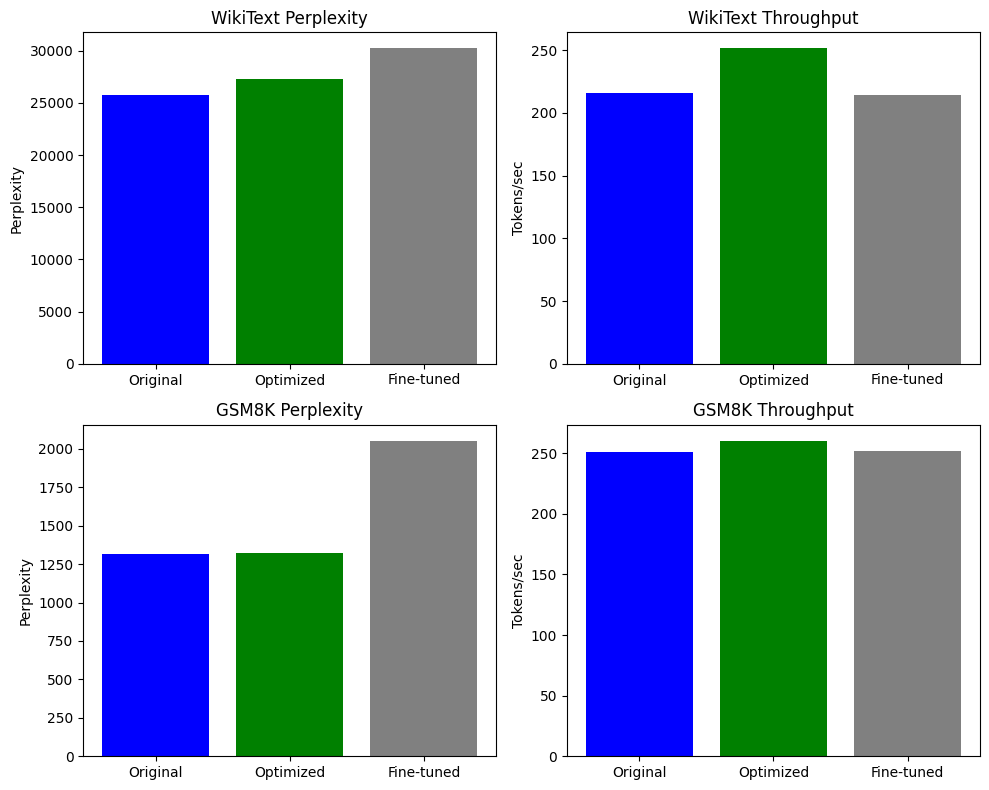

In [36]:
wikitext_throughput = [wikitext_throughput_base, throughput_wikitext_optimized, wikitext_throughput_finetuned]
gsm8k_throughput = [gsm8k_throughput_base, throughput_gsm8k_optimized, gsm8k_throughput_finetuned]

wikitext_perplexity = [wikitext_perplexity_base, wikitext_perplexity_optimized, wikitext_perplexity_finetuned]
gsm8k_perplexity = [gsm8k_perplexity_base, gsm8k_perplexity_optimized, gsm8k_perplexity_finetuned]

models = ['Original', 'Optimized', 'Fine-tuned']


fig, ax = plt.subplots(2, 2, figsize=(10, 8))

#Perplexity for WikiText
ax[0, 0].bar(models, wikitext_perplexity, color=['blue', 'green', 'gray'])
ax[0, 0].set_title('WikiText Perplexity')
ax[0, 0].set_ylabel('Perplexity')

#Throughput for WikiText
ax[0, 1].bar(models, wikitext_throughput, color=['blue', 'green', 'gray'])
ax[0, 1].set_title('WikiText Throughput')
ax[0, 1].set_ylabel('Tokens/sec')

# Perplexity for GSM8K
ax[1, 0].bar(models, gsm8k_perplexity, color=['blue', 'green', 'gray'])
ax[1, 0].set_title('GSM8K Perplexity')
ax[1, 0].set_ylabel('Perplexity')

#Throughput for GSM8K
ax[1, 1].bar(models, gsm8k_throughput, color=['blue', 'green', 'gray'])
ax[1, 1].set_title('GSM8K Throughput')
ax[1, 1].set_ylabel('Tokens/sec')

plt.tight_layout()
plt.show()
